In [59]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline
import scipy.stats as stats
datestring1 = "201706"
datestring2 = "201707"

Populating the interactive namespace from numpy and matplotlib


### Idea to investigate
Males make longer rides on average than females do.

### Null hypothesis
Mean ride length (males) <= mean ride length (females).

### Alternative hypothesis
Mean ride length (males) > mean ride length (females).

### Significance level
alpha = 0.05

In [7]:
os.getenv("PUIDATA")
os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring1 + "-citibike-tripdata.zip")
os.system("mv " + datestring1 + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring1 + "-citibike-tripdata.zip")

os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring2 + "-citibike-tripdata.zip")
os.system("mv " + datestring2 + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring2 + "-citibike-tripdata.zip")


2304

In [101]:
input1=pd.read_csv(os.getenv("PUIDATA")+"/"+datestring1+"-citibike-tripdata.csv")
input2=pd.read_csv(os.getenv("PUIDATA")+"/"+datestring2+"-citibike-tripdata.csv")                   

In [102]:
df=pd.concat([input1,input2])

In [103]:
# Check it merged OK

print("Two inputs (one month each): ", input1.shape,"  ", input2.shape)
print("Merged (two months): ", df.shape)

Two inputs (one month each):  (1731594, 15)    (1735599, 15)
Merged (two months):  (3467193, 15)


In [104]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [105]:
df.head()

,tripduration,gender
0,1397,1
1,1103,1
2,1810,1
3,1760,2
4,2165,1


In [106]:
# descriptive stats for males and females before removal of outliers
a=df[df.gender == 1].tripduration.describe()
b=df[df.gender == 2].tripduration.describe()
pd.DataFrame([a,b],index=['Male','Female'])

,count,mean,std,min,25%,50%,75%,max
Male,2231314.0,915.674561,11655.232424,61.0,356.0,586.0,997.0,3765047.0
Female,802274.0,1021.775620,10430.924660,61.0,426.0,702.0,1175.0,3050849.0


In [107]:
quantile=df.tripduration.quantile(0.90)
print("Original shape: ",df.shape)
df=df[df.tripduration < quantile]
print("Trimmed shape: ",df.shape)

Original shape:  (3467193, 2)
Trimmed shape:  (3120128, 2)


In [108]:
# descriptive stats for males and females after removal of 
a=df[df.gender == 1].tripduration.describe()
b=df[df.gender == 2].tripduration.describe()
pd.DataFrame([a,b],index=['Male','Female'])

,count,mean,std,min,25%,50%,75%,max
Male,2070291.0,646.286923,391.400315,61.0,341.0,547.0,877.0,1738.0
Female,721359.0,725.304064,405.057347,61.0,401.0,637.0,994.0,1738.0


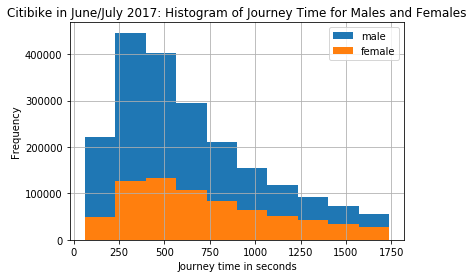

In [109]:
# represent this as a histogram

df[df['gender'] == 1].tripduration.hist(label="male")
df[df['gender'] == 2].tripduration.hist(label="female")
pl.xlabel("Journey time in seconds")
pl.ylabel("Frequency")
pl.title("Citibike in June/July 2017: Histogram of Journey Time for Males and Females")
pl.legend()


In [113]:
print("*** Citibike average trip length in June/July 2017 ***")
print("Male: %.2f seconds"%gender_av['tripduration'][1])
print("Female: %.2f seconds"%gender_av['tripduration'][2])

*** Citibike average trip length in June/July 2017 ***
Male: 646.29 seconds
Female: 725.30 seconds


In [110]:
gender_av=df.groupby('gender').mean()

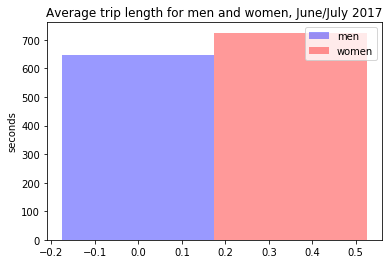

In [112]:
# Visual inspection for hypothesis that males and females have different ride lengths based on the overall mean

fig, ax = pl.subplots()

ind = np.arange(1)
bar_width = 0.35
categories=("Men","Women")

bar1=pl.bar(ind,gender_av['tripduration'][1], bar_width, alpha=0.4, color="b", label="men")
bar2=pl.bar(ind+bar_width,gender_av['tripduration'][2], bar_width, alpha=0.4, color="r", label='women')


plt.ylabel('seconds')
plt.legend()
plt.title('Average trip length for men and women, June/July 2017')

In [114]:
# Use two sample T-test

#stats.f_oneway(df[df.gender == 1].tripduration,df[df.gender == 2].tripduration)

stats.ttest_ind(df[df.gender == 1].tripduration,df[df.gender == 2].tripduration,equal_var=True,nan_policy='omit',axis=0)

Ttest_indResult(statistic=-146.32319263153963, pvalue=0.0)

### Null hypothesis is rejected because p<0.05.